In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Pre-Modeling

#### Assemble the data

In [134]:
bidders = pd.read_csv("./Resources/bidders.csv", index_col =False)
bidder_encoding = pd.read_csv("./Resources/bidder_encoding.csv", index_col =False)
bidder_auc = pd.read_csv("./Resources/bidder_auc.csv")
# bidder_auc_cm = pd.read_csv("./Resources/bidder_auc_cm.csv")
train = pd.read_csv("./Resources/train.csv")

bidders = bidders.merge(bidder_encoding, right_index=True, left_index=True)
# bidders = bidders.merge(bidder_auc, right_index=True, left_index=True)
# bidders = bidders.merge(bidder_auc_cm, right_index=True, left_index=True)

print(bidders.shape)
bidders.head()

(6614, 50)


,bidder_id,auction_count,device_count,country_count,ip_count,url_count,bidder_rank_min,bid_count,time_mean,time_median,...,device_phone2,device_phone22,device_phone25,device_phone28,device_phone3,device_phone35,device_phone4,device_phone45,device_phone46,device_phone65
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.0,1.0,1.0,1.0,1899.0,1.0,3.488293e+12,2.212457e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,002d229ffb247009810828f648afc2ef593rb,1.0,2.0,1.0,1.0,1.0,51.0,2.0,1.052632e+08,1.052632e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.0,1.0,1.0,1.0,23448.0,1.0,3.488293e+12,2.212457e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.0,3.0,1.0,3.0,2.0,121.0,3.0,3.297784e+13,3.297784e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00486a11dff552c4bd7696265724ff81yeo9v,13.0,8.0,1.0,10.0,7.0,62.0,20.0,4.018413e+12,9.177368e+11,...,0.0,0.0,0.0,0.0,0.0,2.0,7.0,5.0,0.0,2.0


In [135]:
# merged_bidders = train.merge(bidders, how= "left", on="bidder_id")
# Since the bidders who never bid are all human, just ignore them with inner join 
merged_bidders = train.merge(bidders, how= "inner", on="bidder_id")
# merged_bidders = train.merge(bidder_auc, how= "inner", on="bidder_id")

print(merged_bidders.shape)
merged_bidders.head()

(1984, 53)


,bidder_id,payment_account,address,outcome,auction_count,device_count,country_count,ip_count,url_count,bidder_rank_min,...,device_phone2,device_phone22,device_phone25,device_phone28,device_phone3,device_phone35,device_phone4,device_phone45,device_phone46,device_phone65
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,14.0,6.0,20.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,2.0,1.0,3.0,2.0,73166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,2.0,396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1395.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,53.0,2.0,123.0,91.0,4.0,...,1.0,1.0,7.0,0.0,11.0,1.0,19.0,5.0,0.0,0.0


Since each bidder in train dataset has corresponding unique payment account and address, and bidder_id is also a unique id that won't be useful for machine lerning. <br>
These three columns could be dropped.

In [136]:
merged_bidders = merged_bidders.drop(columns=["bidder_id","payment_account", "address"])
# merged_bidders = merged_bidders.drop(columns=["auction"])

print(merged_bidders.shape)
merged_bidders.head()

(1984, 50)


,outcome,auction_count,device_count,country_count,ip_count,url_count,bidder_rank_min,bid_count,time_mean,time_median,...,device_phone2,device_phone22,device_phone25,device_phone28,device_phone3,device_phone35,device_phone4,device_phone45,device_phone46,device_phone65
0,0.0,18.0,14.0,6.0,20.0,1.0,5.0,24.0,5.711121e+11,3.458421e+11,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
1,0.0,1.0,2.0,1.0,3.0,2.0,73166.0,3.0,3.233579e+12,3.233579e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,2.0,1.0,4.0,2.0,396.0,4.0,2.379000e+12,2.532053e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1395.0,1.0,3.488293e+12,2.212457e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,23.0,53.0,2.0,123.0,91.0,4.0,155.0,7.777888e+10,1.368421e+10,...,1.0,1.0,7.0,0.0,11.0,1.0,19.0,5.0,0.0,0.0


In [157]:
# merged_bidders.to_csv("./Resources/merged_bidders.csv", index=False)

In [137]:
model_data = merged_bidders.copy()

In [111]:
# Feature selection, drop unrelated features if necessary
# columns_to_drop = []
# model_data.drop(columns_to_drop, axis=1, inplace=True)
# print(model_data.shape)
# model_data.head()

(1984, 46)


,outcome,auction_count,device_count,country_count,ip_count,url_count,bidder_rank_min,bid_count,time_mean,time_median,...,device_phone2,device_phone22,device_phone25,device_phone28,device_phone3,device_phone35,device_phone4,device_phone45,device_phone46,device_phone65
0,0.0,18.0,14.0,6.0,20.0,1.0,5.0,24.0,5.711121e+11,3.458421e+11,...,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
1,0.0,1.0,2.0,1.0,3.0,2.0,73166.0,3.0,3.233579e+12,3.233579e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,2.0,1.0,4.0,2.0,396.0,4.0,2.379000e+12,2.532053e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1395.0,1.0,3.488293e+12,2.212457e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,23.0,53.0,2.0,123.0,91.0,4.0,155.0,7.777888e+10,1.368421e+10,...,1.0,1.0,7.0,0.0,11.0,1.0,19.0,5.0,0.0,0.0


#### Spilt and scale the data

In [158]:
# Split our preprocessed data into features and target arrays
y = model_data["outcome"].values
X = model_data.drop(columns= "outcome", axis= 1).values

# Split the preprocessed data into a training and testing dataset
# Default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Customize the split size
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.8)

In [159]:
# Create a Scaler instances: Try two scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Balanced RandomForest Classifier

In [160]:
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(n_estimators=240, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score: 0.8882978723404256
Confusion Matrix


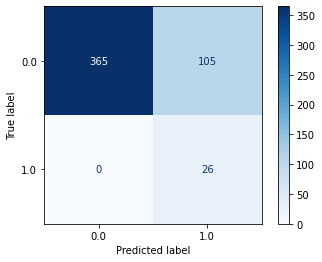

Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      0.78      1.00      0.87      0.88      0.76       470
        1.0       0.20      1.00      0.78      0.33      0.88      0.79        26

avg / total       0.96      0.79      0.99      0.85      0.88      0.76       496



In [161]:
print(f"Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

# Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

print(f"Classification Report:\n {classification_report_imbalanced(y_test, y_pred)}")

In [181]:
# List the features sorted in descending order by feature importance
x = merged_bidders.drop(columns= "outcome", axis= 1)
import_score = model.fit(X_train, y_train).feature_importances_
import_rank = sorted(zip(import_score, x.columns), reverse=True)
importances = pd.DataFrame(import_rank, columns=["Feature Score", "Features"])
importances = importances[["Features", "Feature Score"]]
importances.index = np.arange(1, len(importances)+1)
top_10 = importances.head(20)
top_10

,Features,Feature Score
1,time_median,0.123115
2,bid_count,0.091609
3,device_Others,0.088678
4,time_mean,0.083260
5,country_Others,0.069841
6,bidder_rank_min,0.056116
7,time_std,0.053148
8,auction_count,0.035446
9,ip_count,0.031713
10,device_count,0.020519


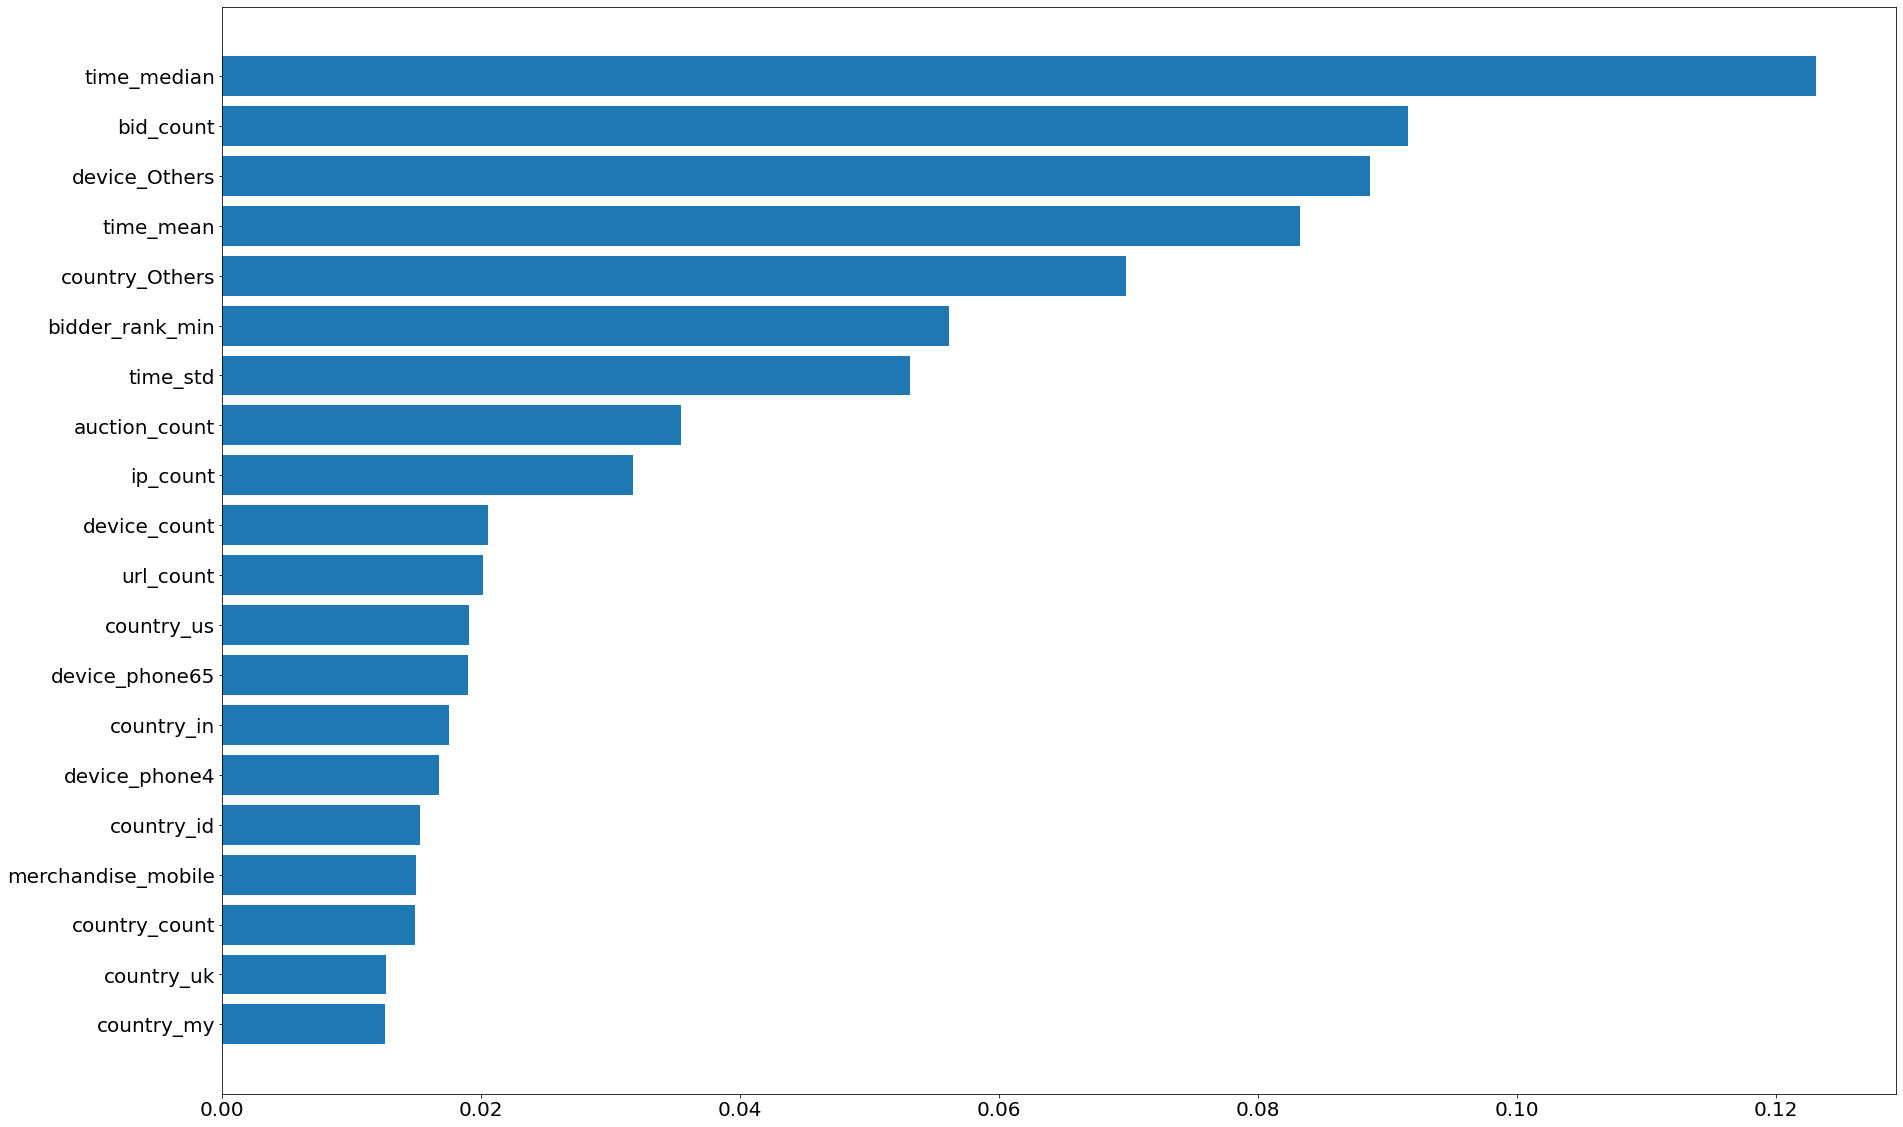

In [187]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

fig, ax = plt.subplots(figsize=(30,20))
x = top_10["Feature Score"].values
y = top_10["Features"]

plt.barh(y,x, align='center')
plt.gca().invert_yaxis()
plt.show()

#### Easy Ensemble Classifier

In [193]:
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=200 ,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score: 0.7836333878887071
Confusion Matrix


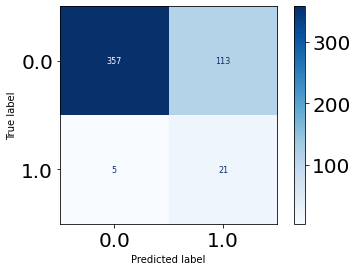

Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.76      0.81      0.86      0.78      0.61       470
        1.0       0.16      0.81      0.76      0.26      0.78      0.62        26

avg / total       0.94      0.76      0.81      0.83      0.78      0.61       496



In [194]:
print(f"Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

# Plot the confusion matrix
print("Confusion Matrix")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

print(f"Classification Report:\n {classification_report_imbalanced(y_test, y_pred)}")

#### Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200, random_state= 42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score: 0.6250409165302783
Confusion Matrix


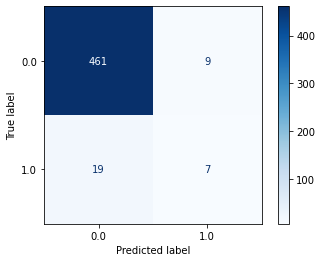

Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.98      0.27      0.97      0.51      0.28       470
        1.0       0.44      0.27      0.98      0.33      0.51      0.25        26

avg / total       0.93      0.94      0.31      0.94      0.51      0.28       496



In [22]:
print(f"Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

# Plot the confusion matrix
print("Confusion Matrix")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

print(f"Classification Report:\n {classification_report_imbalanced(y_test, y_pred)}")

#### Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score: 0.5181669394435352
Confusion Matrix


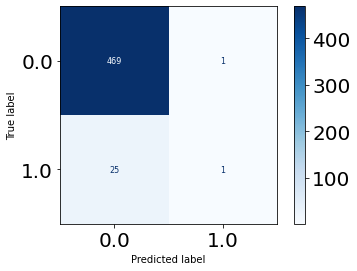

Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      1.00      0.04      0.97      0.20      0.04       470
        1.0       0.50      0.04      1.00      0.07      0.20      0.03        26

avg / total       0.93      0.95      0.09      0.93      0.20      0.04       496



In [190]:
print(f"Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

# Plot the confusion matrix
print("Confusion Matrix")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

print(f"Classification Report:\n {classification_report_imbalanced(y_test, y_pred)}")

#### Ada Boost Classifier

In [191]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy Score: 0.6816693944353519
Confusion Matrix


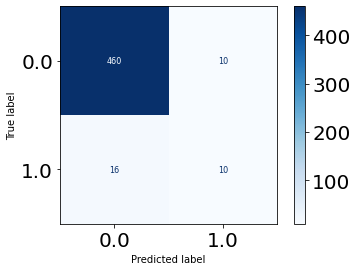

Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.97      0.98      0.38      0.97      0.61      0.40       470
        1.0       0.50      0.38      0.98      0.43      0.61      0.35        26

avg / total       0.94      0.95      0.42      0.94      0.61      0.40       496



In [192]:
print(f"Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")

# Plot the confusion matrix
print("Confusion Matrix")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

print(f"Classification Report:\n {classification_report_imbalanced(y_test, y_pred)}")

### Submission

In [139]:
test = pd.read_csv("./Resources/test.csv")

In [140]:
merged_test = test.merge(bidders, how= "left", on="bidder_id")
merged_test.head()

,bidder_id,payment_account,address,auction_count,device_count,country_count,ip_count,url_count,bidder_rank_min,bid_count,...,device_phone2,device_phone22,device_phone25,device_phone28,device_phone3,device_phone35,device_phone4,device_phone45,device_phone46,device_phone65
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,3.0,2.0,3.0,4.0,3.0,182.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,2.0,3.0,2.0,2.0,1.0,22.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,14.0,4.0,3.0,4.0,2.0,16.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,90.0,81.0,14.0,129.0,80.0,3.0,148.0,...,6.0,1.0,0.0,0.0,4.0,1.0,20.0,0.0,1.0,0.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,20.0,17.0,2.0,17.0,1.0,2.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [141]:
test_id = merged_test["bidder_id"]

In [142]:
merged_test.fillna(merged_test.mean(), inplace=True)

In [143]:
merged_test.isnull().sum()

bidder_id                      0
payment_account                0
address                        0
auction_count                  0
device_count                   0
country_count                  0
ip_count                       0
url_count                      0
bidder_rank_min                0
bid_count                      0
time_mean                      0
time_median                    0
time_std                       0
merchandise_autoparts          0
merchandise_booksandmusic      0
merchandise_clothing           0
merchandise_computers          0
merchandise_furniture          0
merchandise_homegoods          0
merchandise_jewelry            0
merchandise_mobile             0
merchandise_officeequipment    0
merchandise_sportinggoods      0
country_Others                 0
country_br                     0
country_gh                     0
country_id                     0
country_in                     0
country_ke                     0
country_mx                     0
country_my

In [147]:
y_train = model_data["outcome"].values
X_train = model_data.drop(columns= "outcome", axis= 1).values
X_test = merged_test.drop(columns=["bidder_id", "payment_account", "address"])

In [148]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [149]:
model = BalancedRandomForestClassifier(n_estimators=240, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [150]:
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [152]:
submission = pd.read_csv("./Resources/sampleSubmission.csv")
result = pd.DataFrame({"bidder_id": test_id, "predicts": y_pred})
final_sub = submission.merge(result, on="bidder_id", how= "left")
final_sub = final_sub.drop(columns= "prediction", axis = 1)

In [153]:
final_sub["predicts"].value_counts()

0.0    3601
1.0    1099
Name: predicts, dtype: int64

In [154]:
final_sub.isnull().sum()

bidder_id    0
predicts     0
dtype: int64

In [155]:
final_sub.to_csv("Final_results.csv", index=False, header=["bidder_id", "prediction"])